**実習ファイルをアップロードして開いたら、一番上のファイル名「クラス番号氏名」を必ず自分のものに書き換えること。**

# 実習03-1 分類問題の評価指標

今回は、分類問題の予測性能を評価する際に使用する混同行列を導出して理解を深めることを目的とする。

**【課題について】**
* **以下の流れに従ってコードブロックの該当部分にプログラムを記述し、実行していくこと。**
* **一部、テキストブロックに記入・追記する箇所もあるので注意すること**

**必要に応じて前回までの実習内容も参照すること**

## 1. 分類問題のscore（正解率）
まずは、前回と同様に機械学習で分類問題を扱い、score（正解率）を導出する。
### 1-1. データセットの準備

* 今回は、分類問題に使用されるワインのデータセットを使用する。ロードして変数に代入しておく。
[sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

* 変数名.dataがワインの情報、変数名.targetが分類番号（0,1,2）になっている。それぞれ、変数に入れておく。

* データを訓練用とテスト用に分割する。（訓練用60%、**テスト用40%**）

```
# データセットを読み込み、dataとtargetそれぞれ変数に入れる。
from sklearn.datasets import load_wine
dataset = load_wine()
x = dataset.data
t = dataset.target
```
```
# データセットを分割する関数の読み込み
from sklearn.model_selection import train_test_split
# 訓練用データセットとテスト用データセットへの分割（訓練用60%、テスト用40%）
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=指示通りに, random_state=学籍番号)
```

In [ ]:
# データセットを読み込み、dataとtargetそれぞれ変数に入れる。
from sklearn.datasets import load_wine
dataset = load_wine()
x = dataset.data
t = dataset.target

In [ ]:
# データセットを分割する関数の読み込み
from sklearn.model_selection import train_test_split
# 訓練用データセットとテスト用データセットへの分割（訓練用60%、テスト用40%）
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.4, random_state=2220042)
# x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.4, random_state=2220042, stratify=t)

In [ ]:
# 表示して確認してもよい
x_test

### 1-2. モデルを決める
今回は、LinearSVCを使用してみる。
[sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

```
# LinearSVCを使用するためにインポート
from sklearn.svm import LinearSVC
# random_stateを学籍番号に指定する
model = LinearSVC(random_state=2220999)
```

In [ ]:
# LinearSVCを使用するためにインポート
from sklearn.svm import LinearSVC
# random_stateを学籍番号に指定する
model = LinearSVC(random_state=2220042)

### 1-3. モデルを訓練する
モデルに訓練データの入力と出力を与え、fit()で学習させる。<br>
**※学習時は訓練用データのみを与える**


In [ ]:
#fit()で学習
model.fit(x_train, t_train)

LinearSVC(random_state=2220042)

### 1-4.　モデルを評価する
score()を用いて、訓練データとテストデータに対する精度を確認する。

```
model.score(入力, 出力)
```

In [ ]:
# 訓練データに対する精度
model.score(x_train, t_train)

0.9905660377358491

In [ ]:
# テストデータに対する精度
model.score(x_test, t_test)

0.9444444444444444

## 2. 混同行列と各種評価指標
分類問題では、基本的に正解率が高い方がよいが、正解率だけでは不適切な場合もある。ここでは、混同行列（confusion matrix）と、各種評価指標（適合率、再現率、Fscore）を求める。
### 2-1. 混同行列の導出

テストデータ（x_test, t_test）を使用して混同行列を作成する。手順は以下である。

1.   テストデータと作成済みのモデルを使用して予測値（例：t_pred）を得る
2.   sklearn.metrics.confusion_matrix()に正解の値と予測値を与える

```
# 予測値を得る
t_pred = model.predict(x_test)
# confusion_matrixを使用（引数の順に注意）
from sklearn.metrics import confusion_matrix
変数名 = confusion_matrix(正解, 予測)
```


In [ ]:
# 予測値を得る
t_pred = model.predict(x_test)
# confusion_matrixを使用（引数の順に注意）
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(t_test, t_pred)

In [ ]:
# 表示して確認
mat

array([[22,  0,  0],
       [ 2, 26,  2],
       [ 0,  0, 20]])

混同行列は、sklearn.metrics.ConfusionMatrixDisplayを使用して視覚的に表示することもできる。
```
# インポート
from sklearn.metrics import ConfusionMatrixDisplay
# 以下の表示結果は全て同じなので、どれでもOK
# 混同行列を直接指定する場合
ConfusionMatrixDisplay(混同行列).plot()
# 正解と予測を指定する場合
ConfusionMatrixDisplay.from_predictions(正解, 予測)
# モデルと入出力を指定する場合
ConfusionMatrixDisplay.from_estimator(モデル, 入力, 出力)
```


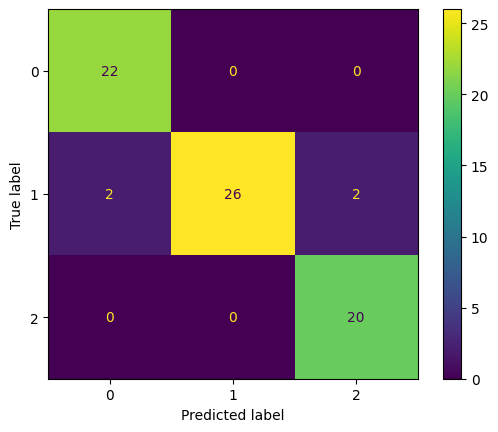

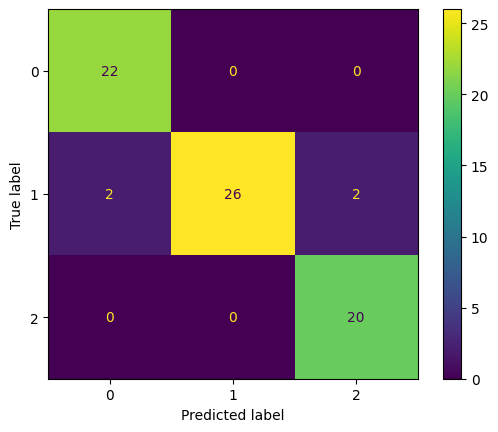

In [ ]:
# インポート
from sklearn.metrics import ConfusionMatrixDisplay

# 以下の表示結果は全て同じなので、どれでもOK
# 混同行列を直接指定する場合
ConfusionMatrixDisplay(mat).plot()

# 正解と予測を指定する場合
# ConfusionMatrixDisplay.from_predictions(t_test, t_pred)

# # モデルと入出力を指定する場合
# ConfusionMatrixDisplay.from_estimator(model,)


**[課題]混同行列の図を見て、以下の説明をしてください。**

*  正しく予測できている個数を表している□はどれですか？**[ 左上，真ん中，右下（予測と正解が同じ）　]**
*  左下のブロックの数値は何を表しているか、言葉で説明してください。**[　予測が０で正解が２だった個数　]**

### 2-2. 各種評価指標の計算（精度、適合率、再現率、F1-score）

今回は、class0を陽性として、各評価指標を計算してみる。まずは、ライブラリを用いて計算してみよう。
```
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("accuracy:", accuracy_score(t_test, t_pred))
print("precision:", precision_score(t_test, t_pred, labels=[0], average=None))
print("recall", recall_score(t_test, t_pred, labels=[0], average=None))
print("f1-score", f1_score(t_test, t_pred, labels=[0], average=None))
```

In [ ]:
# 各評価指標の計算
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("accuracy:", accuracy_score(t_test, t_pred))
print("precision:", precision_score(t_test, t_pred, labels=[0], average=None))
print("recall", recall_score(t_test, t_pred, labels=[0], average=None))
print("f1-score", f1_score(t_test, t_pred, labels=[0], average=None))

accuracy: 0.9444444444444444
precision: [0.91666667]
recall [1.]
f1-score [0.95652174]


**[課題]混同行列の値から全体の正解率（accuracy）、class0の適合率、class0の再現率、class0のF1-scoreを計算し、上記の結果と等しくなることを確認してください。**
（直接数値で計算してもよいし、リストの演算をうまく使用してもいい。）

In [ ]:
# 例：正解率（テストデータのscore、accuracyと同じであることを確認）
accuracy = (mat[0][0]+mat[1][1]+mat[2][2])/mat.sum()
accuracy

0.9444444444444444

In [ ]:
# class0の適合率（precisionと同じになることを確認）
precision = mat[0][0]/(mat[0][0]+mat[1][0])
precision

0.9166666666666666

In [ ]:
# class0の再現率（recallと同じになることを確認）
recall = mat[0][0]/(mat[0][0]+mat[0][1])
recall

1.0

In [ ]:
# class0のF1-score（F1-scoreと同じになることを確認）
# 適合率と再現率の結果を使用してよい）
f1_score = 2*precision*recall/(precision+recall)
f1_score

0.9565217391304348

# 提出について

*   テキストブロックへの追記（混同行列の説明）
*   コードブロックの記入と実行（特に、混同行列から計算した精度）

が確認出来たら、**教員に結果（混同行列の説明、scoreと計算した精度が一致しているか）を確認してもらうこと。** その後、ファイルが保存されているかを確認し、「ファイル＞ダウンロード＞.ipynbをダウンロード」を順にクリックして.ipynbファイルをダウンロードする。

**ダウンロードしたipynbファイルを指定の場所に提出してください。**